In [8]:
for i in range(0,5):
    for j in range(0,5):
        for k in range(0,64):
            print('a[%d][%d][%d] ← a[%d][%d][%d] ⊕ parity(a[0.1.2.3.4][%d][%d]) ⊕ parity(a[0.1.2.3.4][%d][%d])' %(i,j,k,i,j,k, 4 if (j==0) else (j-1),k,0 if (j==4) else (j+1), 63 if (k==0) else (k-1)))

a[0][0][0] ← a[0][0][0] ⊕ parity(a[0.1.2.3.4][4][0]) ⊕ parity(a[0.1.2.3.4][1][63])
a[0][0][1] ← a[0][0][1] ⊕ parity(a[0.1.2.3.4][4][1]) ⊕ parity(a[0.1.2.3.4][1][0])
a[0][0][2] ← a[0][0][2] ⊕ parity(a[0.1.2.3.4][4][2]) ⊕ parity(a[0.1.2.3.4][1][1])
a[0][0][3] ← a[0][0][3] ⊕ parity(a[0.1.2.3.4][4][3]) ⊕ parity(a[0.1.2.3.4][1][2])
a[0][0][4] ← a[0][0][4] ⊕ parity(a[0.1.2.3.4][4][4]) ⊕ parity(a[0.1.2.3.4][1][3])
a[0][0][5] ← a[0][0][5] ⊕ parity(a[0.1.2.3.4][4][5]) ⊕ parity(a[0.1.2.3.4][1][4])
a[0][0][6] ← a[0][0][6] ⊕ parity(a[0.1.2.3.4][4][6]) ⊕ parity(a[0.1.2.3.4][1][5])
a[0][0][7] ← a[0][0][7] ⊕ parity(a[0.1.2.3.4][4][7]) ⊕ parity(a[0.1.2.3.4][1][6])
a[0][0][8] ← a[0][0][8] ⊕ parity(a[0.1.2.3.4][4][8]) ⊕ parity(a[0.1.2.3.4][1][7])
a[0][0][9] ← a[0][0][9] ⊕ parity(a[0.1.2.3.4][4][9]) ⊕ parity(a[0.1.2.3.4][1][8])
a[0][0][10] ← a[0][0][10] ⊕ parity(a[0.1.2.3.4][4][10]) ⊕ parity(a[0.1.2.3.4][1][9])
a[0][0][11] ← a[0][0][11] ⊕ parity(a[0.1.2.3.4][4][11]) ⊕ parity(a[0.1.2.3.4][1][10])
a[0][0][

In [6]:
for x in range(0,5):
    print('D[x,z]=C[(x-1) mod 5, z] ⊕ C[(x+1) mod 5, (z –1) mod w]')

3

In [6]:
from ctypes import *
so_file = r'bitmanip.dll'
bitmanip = cdll.LoadLibrary(so_file)

FileNotFoundError: Could not find module 'bitmanip.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [9]:
def shuffle32_stage(src, ml, mr, n):
    x = src & ~(ml | mr)
    x |= ((src << n) & ml) | ((src >> n) & mr)
    return x

In [12]:
def rv32b_shfl(rs1, rs2):
    x = rs1;
    shamt = rs2 & 15;

    if (shamt & 8):
        x = shuffle32_stage(x, 0x00FF0000, 0x0000FF00, 8);
    if (shamt & 4):
        x = shuffle32_stage(x, 0x0F000F00, 0x00F000F0, 4);
    if (shamt & 2):
        x = shuffle32_stage(x, 0x30303030, 0x0C0C0C0C, 2);
    if (shamt & 1):
        x = shuffle32_stage(x, 0x44444444, 0x22222222, 1);

    return x

#""  generalized unshuffle UNSHFL / UNSHFLI

def rv32b_shfl(rs1, rs2):

    x = rs1;
    shamt = rs2 & 15;

    if (shamt & 1):
        x = shuffle32_stage(x, 0x44444444, 0x22222222, 1);
    if (shamt & 2):
        x = shuffle32_stage(x, 0x30303030, 0x0C0C0C0C, 2);
    if (shamt & 4):
        x = shuffle32_stage(x, 0x0F000F00, 0x00F000F0, 4);
    if (shamt & 8):
        x = shuffle32_stage(x, 0x00FF0000, 0x0000FF00, 8);

    return x;

In [1]:
'{:07b}'.format(30)

'0011110'

In [2]:
'{:05b}'.format(3)

'00011'

In [3]:
'{:03b}'.format(7)

'111'

In [4]:
hex(int('010110', 2))

'0x16'

In [23]:
imm_val = 0
rs2_val = 0
rs1_val = 0
fn3_val = 3
rd_val  = 6

In [24]:
imm_val = 0
rs2_val = 0
rs1_val = 0
fn3_val = 3
rd_val  = 6
imm = '{:07b}'.format(imm_val)
rs2 = '{:05b}'.format(rs2_val)
rs1 = '{:05b}'.format(rs1_val)
fn3 = '{:03b}'.format(fn3_val)
rd  = '{:05b}'.format( rd_val)
raw = imm + rs2 + rs1 + fn3 + rd + '1111111'
hex(int(raw, 2))

'00000000000000000011001101111111'

In [25]:
hex(int(raw, 2))

'0x337f'

In [36]:
hex(int('{:02b}'.format(1)+'{:07b}'.format(0), 2))

'0x80'

In [37]:
print(hex(0xfffffff8000005dc ^ 0xfffff801000007ff))

0x7f900000223


In [12]:
def rotate_right(x, n):
    return hex(int(f"{x:064b}"[-n:] + f"{x:064b}"[:-n], 2))

def rotate_left(x, n):
    return hex(int(f"{x:064b}"[n:] + f"{x:064b}"[:n], 2))

In [13]:
rotate_right(0x7f900000223, 30)

'0x88c00001fe4'

In [14]:
rotate_left(0x7f900000223, 30)

'0x40000088c00001fe'

In [43]:
int(bin(0x1e),2)

30

In [34]:
def rot(a,b):
    return (a >> b) | (a << 64-b)

In [35]:
rot(0x7f900000223, 30)

150599218627162167844836

In [1]:
hex(1500)

'0x5dc'

In [4]:
hex(int((bin(-1500)),2))

'-0x5dc'

In [40]:
x = '{:064b}'.format(0x7f900000223)
x

'0000000000000000000001111111100100000000000000000000001000100011'

In [41]:
temp = list(x)

In [42]:
n = 30
 
list_1 = temp
if n>len(list_1):
    n = int(n%len(list_1))
list_1 = (list_1[-n:] + list_1[:-n])
 
final = ''.join(map(str, list_1))

In [43]:
hex(int((final),2))

'0x88c00001fe4'

In [ ]:
(a >> b) | (a << 64-b)

In [54]:
hex(0x7f900000223 >> (0x1e &63))

'0x1fe4'

In [55]:
hex(0x7f900000223 << 64- (0x1e & 63))

'0x1fe40000088c00000000'

In [13]:
lst = [
    [0,0],
    [1,3],
    [2,1],
    [3,4],
    [4,2],
    [0,2],
    [1,0],
    [2,3],
    [3,1],
    [4,4],
    [0,4],
    [1,2],
    [2,0],
    [3,3],
    [4,1],
    [0,1],
    [1,4],
    [2,2],
    [3,0],
    [4,3],
    [0,3],
    [1,1],
    [2,4],
    [3,2],
    [4,0]
]

In [14]:
temp = []
for x in lst:
    temp.append(8*x[0] + 40*x[1])
    print(8*x[0] + 40*x[1])

0
128
56
184
112
80
8
136
64
192
160
88
16
144
72
40
168
96
24
152
120
48
176
104
32


In [15]:
temp.sort()

In [16]:
temp

[0,
 8,
 16,
 24,
 32,
 40,
 48,
 56,
 64,
 72,
 80,
 88,
 96,
 104,
 112,
 120,
 128,
 136,
 144,
 152,
 160,
 168,
 176,
 184,
 192]

In [9]:
for col in [0,1,2,3,4]:
    for row in [0,1,2,3,4]:
        print(8*row + 40*col)

0
8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128
136
144
152
160
168
176
184
192


In [34]:
new = []
old = []
a = []
b = []
c = []
d = []
for col in [0,1,2,3,4]:
    for row in [0,1,2,3,4]:
        new.append([row, col])
        old.append([(row+3*col)%5, row])
        a.append("A'"+str([row, col]))
        b.append(8*row + 40*col)
        c.append("A"+str([(row+3*col)%5, row]))
        d.append(8*((row+3*col)%5) + 40*(row))
        print("A'",str([row, col]),'=',8*row + 40*col, ' <= ',"A", str([(row+3*col)%5, row]), '=', 8*((row+3*col)%5) + 40*(row))

A' [0, 0] = 0  <=  A [0, 0] = 0
A' [1, 0] = 8  <=  A [1, 1] = 48
A' [2, 0] = 16  <=  A [2, 2] = 96
A' [3, 0] = 24  <=  A [3, 3] = 144
A' [4, 0] = 32  <=  A [4, 4] = 192
A' [0, 1] = 40  <=  A [3, 0] = 24
A' [1, 1] = 48  <=  A [4, 1] = 72
A' [2, 1] = 56  <=  A [0, 2] = 80
A' [3, 1] = 64  <=  A [1, 3] = 128
A' [4, 1] = 72  <=  A [2, 4] = 176
A' [0, 2] = 80  <=  A [1, 0] = 8
A' [1, 2] = 88  <=  A [2, 1] = 56
A' [2, 2] = 96  <=  A [3, 2] = 104
A' [3, 2] = 104  <=  A [4, 3] = 152
A' [4, 2] = 112  <=  A [0, 4] = 160
A' [0, 3] = 120  <=  A [4, 0] = 32
A' [1, 3] = 128  <=  A [0, 1] = 40
A' [2, 3] = 136  <=  A [1, 2] = 88
A' [3, 3] = 144  <=  A [2, 3] = 136
A' [4, 3] = 152  <=  A [3, 4] = 184
A' [0, 4] = 160  <=  A [2, 0] = 16
A' [1, 4] = 168  <=  A [3, 1] = 64
A' [2, 4] = 176  <=  A [4, 2] = 112
A' [3, 4] = 184  <=  A [0, 3] = 120
A' [4, 4] = 192  <=  A [1, 4] = 168


In [44]:
import pandas as pd
test = pd.DataFrame(list(zip(a,b,c,d)))
test2 = test.sort_values(3)
test2

,0,1,2,3
0,"A'[0, 0]",0,"A[0, 0]",0
10,"A'[0, 2]",80,"A[1, 0]",8
20,"A'[0, 4]",160,"A[2, 0]",16
5,"A'[0, 1]",40,"A[3, 0]",24
15,"A'[0, 3]",120,"A[4, 0]",32
16,"A'[1, 3]",128,"A[0, 1]",40
1,"A'[1, 0]",8,"A[1, 1]",48
11,"A'[1, 2]",88,"A[2, 1]",56
21,"A'[1, 4]",168,"A[3, 1]",64
6,"A'[1, 1]",48,"A[4, 1]",72


In [103]:
test2[[1]]

,1
0,0
10,80
20,160
5,40
15,120
16,128
1,8
11,88
21,168
6,48


In [106]:
for x in test2[[1]].iterrows():
    print('addi x10, t1,', x[1][1])

addi x10, t1, 0
addi x10, t1, 80
addi x10, t1, 160
addi x10, t1, 40
addi x10, t1, 120
addi x10, t1, 128
addi x10, t1, 8
addi x10, t1, 88
addi x10, t1, 168
addi x10, t1, 48
addi x10, t1, 56
addi x10, t1, 136
addi x10, t1, 16
addi x10, t1, 96
addi x10, t1, 176
addi x10, t1, 184
addi x10, t1, 64
addi x10, t1, 144
addi x10, t1, 24
addi x10, t1, 104
addi x10, t1, 112
addi x10, t1, 192
addi x10, t1, 72
addi x10, t1, 152
addi x10, t1, 32


In [1]:
for col in [0,1,2,3,4]:
    for row in [0,1,2,3,4]:
        print('An[',row,', ',col,'] = A[',row,', ',col,'] ⊕ ((A[',(row+1)%5,', ',col,'] ⊕ 1) ⋅ A[',(row+2)%5,', ',col,']',sep='')

An[0, 0] = A[0, 0] ⊕ ((A[1, 0] ⊕ 1) ⋅ A[2, 0]
An[1, 0] = A[1, 0] ⊕ ((A[2, 0] ⊕ 1) ⋅ A[3, 0]
An[2, 0] = A[2, 0] ⊕ ((A[3, 0] ⊕ 1) ⋅ A[4, 0]
An[3, 0] = A[3, 0] ⊕ ((A[4, 0] ⊕ 1) ⋅ A[0, 0]
An[4, 0] = A[4, 0] ⊕ ((A[0, 0] ⊕ 1) ⋅ A[1, 0]
An[0, 1] = A[0, 1] ⊕ ((A[1, 1] ⊕ 1) ⋅ A[2, 1]
An[1, 1] = A[1, 1] ⊕ ((A[2, 1] ⊕ 1) ⋅ A[3, 1]
An[2, 1] = A[2, 1] ⊕ ((A[3, 1] ⊕ 1) ⋅ A[4, 1]
An[3, 1] = A[3, 1] ⊕ ((A[4, 1] ⊕ 1) ⋅ A[0, 1]
An[4, 1] = A[4, 1] ⊕ ((A[0, 1] ⊕ 1) ⋅ A[1, 1]
An[0, 2] = A[0, 2] ⊕ ((A[1, 2] ⊕ 1) ⋅ A[2, 2]
An[1, 2] = A[1, 2] ⊕ ((A[2, 2] ⊕ 1) ⋅ A[3, 2]
An[2, 2] = A[2, 2] ⊕ ((A[3, 2] ⊕ 1) ⋅ A[4, 2]
An[3, 2] = A[3, 2] ⊕ ((A[4, 2] ⊕ 1) ⋅ A[0, 2]
An[4, 2] = A[4, 2] ⊕ ((A[0, 2] ⊕ 1) ⋅ A[1, 2]
An[0, 3] = A[0, 3] ⊕ ((A[1, 3] ⊕ 1) ⋅ A[2, 3]
An[1, 3] = A[1, 3] ⊕ ((A[2, 3] ⊕ 1) ⋅ A[3, 3]
An[2, 3] = A[2, 3] ⊕ ((A[3, 3] ⊕ 1) ⋅ A[4, 3]
An[3, 3] = A[3, 3] ⊕ ((A[4, 3] ⊕ 1) ⋅ A[0, 3]
An[4, 3] = A[4, 3] ⊕ ((A[0, 3] ⊕ 1) ⋅ A[1, 3]
An[0, 4] = A[0, 4] ⊕ ((A[1, 4] ⊕ 1) ⋅ A[2, 4]
An[1, 4] = A[1, 4] ⊕ ((A[2, 4] ⊕ 1

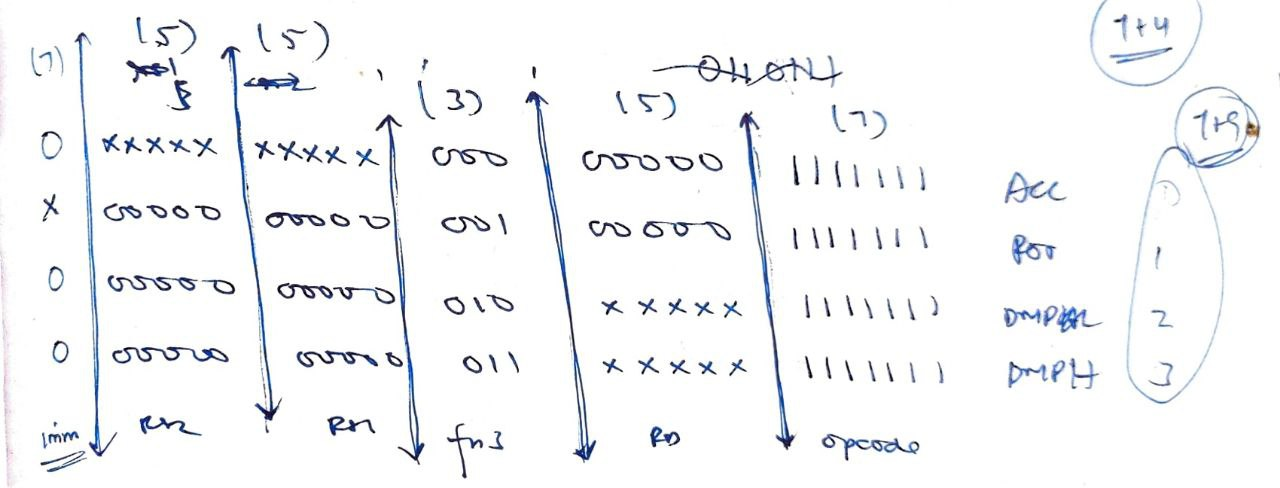

In [119]:
#SHA3
imm_val = 0
rs1_val = 0
rs2_val = 0
fn3_val = 3 # 0 = ACC, 1 = ROT, 2 = DMPL, 3 = DMPH
rd_val  = 5
imm = '{:07b}'.format(imm_val)
rs2 = '{:05b}'.format(rs2_val)
rs1 = '{:05b}'.format(rs1_val)
fn3 = '{:03b}'.format(fn3_val)
rd  = '{:05b}'.format( rd_val)
raw = imm + rs2 + rs1 + fn3 + rd + '1111111'
hex(int(raw, 2))

'0x32ff'

In [85]:
#UNZIP
rd_val  = 5
rs1_val = 3
rs1 = '{:05b}'.format(rs1_val)
rd  = '{:05b}'.format( rd_val)
raw = '000010001111' + rs1 + '101' + rd + '0010011'
hex(int(raw, 2))

'0x8f1d293'

In [91]:
#ZIP
rd_val  = 11
rs1_val = 9
rs1 = '{:05b}'.format(rs1_val)
rd  = '{:05b}'.format( rd_val)
raw = '000010001111' + rs1 + '001' + rd + '0010011'
hex(int(raw, 2))

'0x8f49593'

In [87]:
#ROL
rd_val  = 9
rs1_val = 7
rs2_val = 29
rs2 = '{:05b}'.format(rs2_val)
rs1 = '{:05b}'.format(rs1_val)
rd  = '{:05b}'.format( rd_val)
raw = '0110000' +rs2+ rs1+ '001'+rd+'0110011'
hex(int(raw, 2))

'0x61d394b3'

In [ ]:
#ANDN
rd_val  = 26
rs1_val = 10
rs2_val = 8
rs2 = '{:05b}'.format(rs2_val)
rs1 = '{:05b}'.format(rs1_val)
rd  = '{:05b}'.format( rd_val)
raw = '0100000' + rs2 + rs1 + '111' + rd + '0110011'
hex(int(raw, 2))

In [77]:
raw = '110010100001101011011110100110'[::-1]+ '1' + ''.join([str(0)]*1056) + '1' 
hex(int(raw, 2))

'0x65ed614e000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001'

In [74]:
len(raw)

30

In [3]:
#python3 code for sha3 cryptographic algorithm
import numpy as np
import random
l = 6  # value of l = {0, 1, 2, 3, 4, 5, 6}
b = 25*(2**l)  # b = state size (value of b = {25, 50, 100, 200, 400, 800, 1600} )
# For SHA-3 the value of ‘l’ was 6 and the
# so rounds turn out to be
rounds = 12 + 2*l  # 24 rounds
print(str(rounds)+' Rounds in SHA-3')
# So SHA-3 has state size of 1600 bits and the number of rounds of computations will be 24


# 1600 bits(1 dimensional array) to 3 dimensional array of 5x5x64
def _1Dto3D(A):
    A_out = np.zeros((5, 5, 64), dtype = int) # Initialize empty 5x5x64 array
    for i in range(5):
        for j in range(5):
            for k in range(64):
                A_out[i][j][k] = A[64*(5*j + i) + k]
    return A_out


def theta(A):
        A_out = np.zeros((5,5,64), dtype = int)  # Initialize empty 5x5x64 array
       #A_out = [[[0 for _ in range(64)] for _ in range(5)] for _ in range(5)] #without numpy
        for i in range(5):
                for j in range(5):
                        for k in range(64):
                            C=sum([A[(i-1)%5][ji][k] for ji in range(5)]) % 2 # XOR=mod2 5 bit column "to the left" of the original bit
                            D=sum([A[((i+1) % 5)][ji][(k-1)%64] for ji in range(5)]) % 2 #XOR=mod2 5 bit column "to the right"  and one position "to the front" of the original bit
                            temp=C+D+A[i][j][k] % 2 #XORing original bit with A and B
                            A_out[i][j][k]=temp
        return A_out

#Rho : Each word is rotated by a fixed number of position according to table.
def rho(A):
    rhomatrix=[[0,36,3,41,18],[1,44,10,45,2],[62,6,43,15,61],[28,55,25,21,56],[27,20,39,8,14]]
    rhom = np.array(rhomatrix, dtype=int)  # Initialize empty 5x5x64 array
    A_out = np.zeros((5,5,64), dtype = int)
    for i in range(5):
        for j in range(5):
            for k in range(64):
                A_out[i][j][k] = A[i][j][k - rhom[i][j]] #  A[i][j][k − (t + 1)(t + 2)/2] so here rhom[i][j] Use lookup table to "calculate" (t + 1)(t + 2)/2
    return A_out

#Pi: Permutate the 64 bit words
def pi(A):
    A_out = np.zeros((5,5,64), dtype = int) # Initialize empty 5x5x64 array
    for i in range(5):
        for j in range(5):
            for k in range(64):
                A_out[j][(2*i+3*j)%5][k] = A[i][j][k]
    return A_out

# A_out [i][j][k] = A[i][j][k] XOR ( (A[i + 1][j][k] XOR 1) AND (ain[i + 2][j][k]) )
def chi(A):
    A_out = np.zeros((5,5,64), dtype = int) # Initialize empty 5x5x64 array
    for i in range(5):
        for j in range(5):
            for k in range(64):
                A_out = (A[i][j][k]+(((A[(i + 1)%5][j][k] + 1 )% 2) * (A[(i + 2)%5][j][k]))) % 2
    return A_out

#iota: add constants  to word (0,0)
# aout[i][j][k] = ain[i][j][k] ⊕ bit[i][j][k]
# for 0 ≤ ℓ ≤ 6, we have bit[0][0][2ℓ − 1] = rc[ℓ + 7ir]
def iota(A, round):
    # Initialize empty arrays
    A_out = A.copy()
    bit = np.zeros((5,5,64), dtype=int)
    rc = np.zeros((168), dtype=int)

    #generation of rc as Linear Feedback Shift Register
    w = np.array([1,0,0,0,0,0,0,0], dtype = int)
    rc[0] = w[0]
    for i in range(1, 168): #7*24
        w = [w[1],w[2],w[3],w[4],w[5],w[6],w[7], (w[0]+w[4]+w[5]+w[6]) % 2]
        rc[i] = w[0]

    # Calculate A_out
    for l in range(7):
        A_out[0][0][2**l - 1] ^=rc[l + 7*round]

# 5x5x64 (three-dimensional array) into 1600 bits(one-dimensional array)
def _3Dto1D(A):
    A_out = np.zeros(1600, dtype = int) # Initialize empty array of size 1600
    for i in range(5):
        for j in range(5):
            for k in range(64):
                A_out[64*(5*j+i)+k] = A[i][j][k]
    return A_out

# 24 X (ι ◦ χ ◦ π ◦ ρ ◦ θ)
def SHA3(SHA_in):
    length=len(SHA_in)
    A_3D = _1Dto3D(SHA_in)
    for r in range(24):
        SHA_out_3D = iota(chi(pi(rho(theta(A_3D)))), r)
    SHA_out = _3Dto1D(SHA_out_3D)
    return SHA_out

24 Rounds in SHA-3


In [5]:
SHA3('hello_world'.encode("utf-8").hex())

ValueError: invalid literal for int() with base 10: 'c'

In [6]:
import hashlib

In [9]:
import sys
import hashlib
 
if sys.version_info < (3, 6):
    import sha3
 
# initiating the "s" object to use the
# sha3_224 algorithm from the hashlib module.
s = hashlib.sha3_256()
 
# will output the name of the hashing algorithm currently in use.
print(s.name)
 
# will output the Digest-Size of the hashing algorithm being used.
print(s.digest_size)
 
# providing the input to the hashing algorithm.
s.update(b"hello world")
 
print(s.hexdigest())

sha3_256
32
644bcc7e564373040999aac89e7622f3ca71fba1d972fd94a31c3bfbf24e3938


In [10]:
import _sha3

In [13]:
import inspect
print(inspect.getsource(hashlib))

#.  Copyright (C) 2005-2010   Gregory P. Smith (greg@krypto.org)
#  Licensed to PSF under a Contributor Agreement.
#

__doc__ = """hashlib module - A common interface to many hash functions.

new(name, data=b'', **kwargs) - returns a new hash object implementing the
                                given hash function; initializing the hash
                                using the given binary data.

Named constructor functions are also available, these are faster
than using new(name):

md5(), sha1(), sha224(), sha256(), sha384(), sha512(), blake2b(), blake2s(),
sha3_224, sha3_256, sha3_384, sha3_512, shake_128, and shake_256.

More algorithms may be available on your platform but the above are guaranteed
to exist.  See the algorithms_guaranteed and algorithms_available attributes
to find out what algorithm names can be passed to new().

NOTE: If you want the adler32 or crc32 hash functions they are available in
the zlib module.

Choose your hash function wisely.  Some have known colli

In [17]:
help(_sha3.sha3_256)

Help on class sha3_256 in module _sha3:

class sha3_256(builtins.object)
 |  sha3_256([data], *, usedforsecurity=True) -> SHA3 object
 |  
 |  Return a new SHA3 hash object with a hashbit length of 32 bytes.
 |  
 |  Methods defined here:
 |  
 |  copy(self, /)
 |      Return a copy of the hash object.
 |  
 |  digest(self, /)
 |      Return the digest value as a bytes object.
 |  
 |  hexdigest(self, /)
 |      Return the digest value as a string of hexadecimal digits.
 |  
 |  update(self, data, /)
 |      Update this hash object's state with the provided bytes-like object.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  block_size
 |  
 |  digest_size
 |  
 |  name



In [62]:
s= 'abc'.encode('utf-8')
print(s.hex())

616263


In [58]:
_sha3.sha3_256(b"abc").hexdigest()

'3a985da74fe225b2045c172d6bd390bd855f086e3e9d525b46bfe24511431532'

In [28]:
_sha3.sha3_256(b"hello world").hexdigest()

'644bcc7e564373040999aac89e7622f3ca71fba1d972fd94a31c3bfbf24e3938'

In [29]:
#!/usr/bin/env python
# Evan Paul
# CSCI181
# An Python implementation of SHA-3
import numpy as np
from sys import exit
# Auxillary routine #1
# Expands one-dimensional array into three-dimensional array
def oneToThree(v):
    a = np.zeros((5, 5, 64), dtype = int) # Initialize empty 5x5x64 array
    for i in range(5):
        for j in range(5):
            for k in range(64):
                a[i][j][k] = v[64*(5*j + i) + k]
    return a
# Auxillary routine #2
# Collapses three-dimensional array into one-dimensional array
def threeToOne(a):
    v = np.zeros(1600, dtype = int) # Initialize empty array of size 1600
    for i in range(5):
        for j in range(5):
            for k in range(64):
                v[64*(5*j+i)+k] = a[i][j][k]
    return v
# Subroutine for theta (separated for clarity)
def thetaHelper(ain, i, j, k):
    # First "summation"
    a = np.bitwise_xor(ain[(i-1)%5][0][k], ain[(i-1)%5][1][k])
    b = np.bitwise_xor(ain[(i-1)%5][2][k], ain[(i-1)%5][3][k])
    c = np.bitwise_xor(a, b)
    first = np.bitwise_xor(c, ain[(i-1)%5][4][k])
    # Second "summation"
    d = np.bitwise_xor(ain[(i+1)%5][0][(k-1)%64], ain[(i+1)%5][1][(k-1)%64])
    e = np.bitwise_xor(ain[(i+1)%5][2][(k-1)%64], ain[(i+1)%5][3][(k-1)%64])
    f = np.bitwise_xor(d, e)
    second = np.bitwise_xor(f, ain[(i+1)%5][4][(k-1)%64])
    # XOR of results
    return np.bitwise_xor(first, second)
# Theta
def theta(ain):
    aout = np.zeros((5, 5, 64), dtype = int) # Initialize empty 5x5x64 array
    for i in range(5):
        for j in range(5):
            for k in range(64):
                # XOR with result of sub-routine
                aout[i][j][k] = np.bitwise_xor(ain[i][j][k], thetaHelper(ain, i, j, k))
    return aout
# Rho
def rho(ain):
    rhomatrix=[[0,36,3,41,18],[1,44,10,45,2],[62,6,43,15,61],[28,55,25,21,56],[27,20,39,8,14]]
    rhom = np.array(rhomatrix, dtype=int) # Convert LUT into numpy's array class (for convenience)
    aout = np.zeros((5,5,64), dtype = int) # Initialize empty 5x5x64 array

    for i in range(5):
        for j in range(5):
            for k in range(64):
                select = rhom[i][j] # Use lookup table to "calculate" (t + 1)(t + 2)/2
                aout[i][j][k] = ain[i][j][k - select]
    return aout
# Pi
def pi(ain):
    aout = np.zeros((5,5,64), dtype = int) # Initialize empty 5x5x64 array

    for i in range(5):
        for j in range(5):
            for k in range(64):
                aout[j][(2*i+3*j)%5][k] = ain[i][j][k]
    return aout
# Chi
def chi(ain):
    aout = np.zeros((5,5,64), dtype = int) # Initialize empty 5x5x64 array

    for i in range(5):
        for j in range(5):
            for k in range(64):
                xor = np.bitwise_xor(ain[(i+1)%5][j][k], 1)
                mul = xor * (ain[(i+2)%5][j][k])
                aout[i][j][k] = np.bitwise_xor(ain[i][j][k], mul)
    return aout
# Iota
def iota(ain, rnd):
    # Initialize empty arrays
    aout = np.zeros((5,5,64), dtype = int)
    bit = np.zeros(dtype = int, shape = (5,5,64))
    rc = np.zeros(dtype = int, shape = 168)

    # Linear Feedback Shift Register
    w = np.array([1,0,0,0,0,0,0,0], dtype = int)
    rc[0] = w[0]
    for i in range(1, 7*24):
        a = np.bitwise_xor(w[0], w[4])
        b = np.bitwise_xor(w[5], w[6])
        tail = np.bitwise_xor(a, b)
        w = [w[1],w[2],w[3],w[4],w[5],w[6],w[7], tail]
        rc[i] = w[0]
    # Calculate bits
    for l in range(7):
        q = pow(2, l) - 1
        t = l + 7*rnd
        bit[0][0][q] = rc[l + 7*rnd]
    # Calculate aout
    for i in range(5):
        for j in range(5):
            for k in range(64):
                aout[i][j][k] = np.bitwise_xor(ain[i][j][k], bit[i][j][k])
    return aout


# SHA-3 algorithm
def sha3(pt, padding = True):
    l = len(pt)

    # Convert to numpy format and resize
    v = np.array(pt, dtype = int)
    v.resize(1600)

    if padding:
        if l > 1086:
            sys.exit("Input must be less than or equal to 1086 bits")
        v[l] = 1
        v[1087] = 1

    a = oneToThree(v)
    for rounds in range(24):
        a = iota(chi(pi(rho(theta(a)))), rounds)

    return threeToOne(a)

In [32]:
sha3('123')

C:\Users\Paulson\AppData\Local\Temp\ipykernel_4652\741467030.py:77: RuntimeWarning: overflow encountered in long_scalars
  mul = xor * (ain[(i+2)%5][j][k])


array([ -946371028,  1827400861, -1038299762, ...,  1167195612,
         916347676,  -121762766])

In [43]:
def toBinary(a):
    l,m=[],[]
    for i in a:
        l.append(ord(i))
    for i in l:
        m.append(str(int(bin(i)[2:])))
    return m

print("''hello world'' in binary is ") 
print(toBinary("hello world"))

''hello world'' in binary is 
['1101000', '1100101', '1101100', '1101100', '1101111', '100000', '1110111', '1101111', '1110010', '1101100', '1100100']


In [46]:
hex(int((''.join(toBinary("hello world")) + '1' + '0'*998 + '1'),2))

'0xd19766cdf077dfcb6648000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001'

In [49]:
hex(int((''.join(toBinary("hello world"))),2))

'0xd19766cdf077dfcb664'

In [54]:
bin(0x68656c6c6f20776f726c64)[2:]+'1'+ '0'*998 + '1'

'110100001100101011011000110110001101111001000000111011101101111011100100110110001100100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [57]:
hex(int(bin(0x68656c6c6f20776f726c64)[2:]+'1'+ '0'*998 + '1',2))

'0x68656c6c6f20776f726c648000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001'

In [3]:
A = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
]

In [4]:
for i in [0,1,2,3,4]:
    for j in [0,1,2,3,4]:
        A[i][j] = 0x0000000000000000
A[0][0] = 0x00000001997b5853
A[1][3] = 0x8000000000000000

In [5]:
A[0][0] = 0x00000001997b5853
A[1][3] = 0x8000000000000000

In [6]:
print([0,1,2,3,4][::-1])

[4, 3, 2, 1, 0]


In [7]:
def print_hex(A):
    for i in [0,1,2,3,4]:
        for j in [0,1,2,3,4]:
            print(hex(A[j][i]))

In [8]:
A

[[6869964883, 0, 0, 0, 0],
 [0, 0, 0, 9223372036854775808, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [9]:
print_hex(A)

0x1997b5853
0x0
0x0
0x0
0x0
0x0
0x0
0x0
0x0
0x0
0x0
0x0
0x0
0x0
0x0
0x0
0x8000000000000000
0x0
0x0
0x0
0x0
0x0
0x0
0x0
0x0


In [10]:
def hex_64(a):
    return hex(a) & 0xFFFFFFFFFFFFFFFF

def rot(a,b):
    return ((a << b) & 0xFFFFFFFFFFFFFFFF) | 0xFFFFFFFFFFFFFFFF &(a >> (64-b))

def theta(A):
    C = [0,0,0,0,0]
    D = [0,0,0,0,0]
    
    for x in [0,1,2,3,4]:
        C[x] = A[x][0] ^ A[x][1] ^ A[x][2] ^ A[x][3] ^ A[x][4]
    for x in [0,1,2,3,4]:
        D[x] = C[(x-1)%5] ^ rot(C[(x+1)%5],1)
    for x in [0,1,2,3,4]:
        for y in [0,1,2,3,4]:
            A[x][y] = A[x][y] ^ D[x]
            
    return A

In [11]:
def theta(A):
    C = [0,0,0,0,0]
    D = [0,0,0,0,0]
    
    for x in [0,1,2,3,4]:
        C[x] = A[x][0] ^ A[x][1] ^ A[x][2] ^ A[x][3] ^ A[x][4]
    for x in [0,1,2,3,4]:
        D[x] = C[(x-1)%5] ^ rot(C[(x+1)%5],1)
    for x in [0,1,2,3,4]:
        for y in [0,1,2,3,4]:
            A[x][y] = A[x][y] ^ D[x]
            
    return A

In [12]:
print_hex(theta(A))

0x1997b5852
0x1997b5853
0x8000000000000000
0x0
0x332f6b0a6
0x1
0x1997b5853
0x8000000000000000
0x0
0x332f6b0a6
0x1
0x1997b5853
0x8000000000000000
0x0
0x332f6b0a6
0x1
0x80000001997b5853
0x8000000000000000
0x0
0x332f6b0a6
0x1
0x1997b5853
0x8000000000000000
0x0
0x332f6b0a6


In [19]:
hex(int('11001010000110101101111010011000000110', 2))

'0x3286b7a606'

In [20]:
b'abc'

b'abc'

In [22]:
bin(b'abc')

TypeError: 'bytes' object cannot be interpreted as an integer

In [107]:
a = 0x0000000000000001
b = 0x0
a^b

1

In [108]:
def rot(a,b): # Rotate Left 
    return ((a << b) & 0xFFFFFFFFFFFFFFFF) | 0xFFFFFFFFFFFFFFFF &(a >> (64-b))

In [110]:
hex(rot(0x01, 18))

'0x40000'

In [28]:
hex(1500 ^ (2047 & ~2000))

'0x5f3'

In [29]:
hex((2047 & ~2000))

'0x2f'

In [ ]:
0x1997b5852 ^ (~0xb585300000001997  
& 0x40000000000 [2, 0]

In [18]:
hex(0x00010000 + 0xffffffff)

'0x10000ffff'

In [16]:
hex(-1)

'-0x1'

In [1]:
0x1997b5852

6869964882

In [67]:
def rot(a,b): # Rotate Right 
    return ((a << b) & 0xFFFFFFFFFFFFFFFF) | 0xFFFFFFFFFFFFFFFF &(a >> (64-b))

def rot32(a,b): # Rotate Right 
    return ((a << b) & 0xFFFFFFFF) | 0xFFFFFFFF &(a >> (32-b))

In [56]:
hex(rot(0xa721, 0x12))

'0x29c840000'

In [59]:
hex(rot(0xabcde01234567898, 0x12))

'0x8048d159e262af37'

In [60]:
#bit interleaving
u0_index = []
u0_order = []
u1_index = []
u1_order = []
for i in range(32):
    #print('X(rd)[', i ,'] = X(rs1)[',2*i ,']', end = '\t')
    #print('X(rd)[', i+16 ,'] = X(rs1)[',2*i+1 ,']')
    u0_index.append(i)
    u0_order.append(2*i)
    u1_index.append(i)
    u1_order.append(2*i+1)

In [79]:
inp = 0xabcde01234567898
test = '{:064b}'.format(inp)[::-1]
test

'0001100100011110011010100010110001001000000001111011001111010101'

In [80]:
u0 = 32*[0]
u1 = 32*[0]

for x in zip(u0_index, u0_order):
    print(x)
    u0[x[0]] = test[x[1]]
u0 = hex(int(''.join(u0)[::-1],2))

for x in zip(u1_index, u1_order):
    print(x)
    u1[x[0]] = test[x[1]]
u1 = hex(int(''.join(u1)[::-1],2))

(0, 0)
(1, 2)
(2, 4)
(3, 6)
(4, 8)
(5, 10)
(6, 12)
(7, 14)
(8, 16)
(9, 18)
(10, 20)
(11, 22)
(12, 24)
(13, 26)
(14, 28)
(15, 30)
(16, 32)
(17, 34)
(18, 36)
(19, 38)
(20, 40)
(21, 42)
(22, 44)
(23, 46)
(24, 48)
(25, 50)
(26, 52)
(27, 54)
(28, 56)
(29, 58)
(30, 60)
(31, 62)
(0, 1)
(1, 3)
(2, 5)
(3, 7)
(4, 9)
(5, 11)
(6, 13)
(7, 15)
(8, 17)
(9, 19)
(10, 21)
(11, 23)
(12, 25)
(13, 27)
(14, 29)
(15, 31)
(16, 33)
(17, 35)
(18, 37)
(19, 39)
(20, 41)
(21, 43)
(22, 45)
(23, 47)
(24, 49)
(25, 51)
(26, 53)
(27, 55)
(28, 57)
(29, 59)
(30, 61)
(31, 63)


In [81]:
(u0, u1)

('0x1b846ec4', '0xfac1416a')

In [102]:
u0_temp = hex(rot32(int(u0, 0), 9))
u1_temp = hex(rot32(int(u1, 0), 9))
(u0_temp, u1_temp)

('0x8dd8837', '0x8282d5f5')

In [112]:
u0_temp = hex(rot32(int(u0, 0), 9))
u1_temp = hex(rot32(int(u1, 0), 9))

out1 = 32*[0]
out2 = 32*[0]

u0_temp = '{:032b}'.format(int(u0_temp,0))[::-1]
u1_temp = '{:032b}'.format(int(u1_temp,0))[::-1]

for x in zip(zip_index, zip_order):
    #print(x)
    out1[x[1]] = u0_temp[x[0]]

for x in zip(zip_index, zip_order):
    #print(x)
    out2[x[1]] = u1_temp[x[0]]
    
out1 = int(hex(int(''.join(out1)[::-1],2)), 0)
out2 = int(hex(int(''.join(out2)[::-1],2)), 0)

print(hex(out1), hex(out2),
      hex(((out1 & 0x55555555))|((out2 & 0x55555555)<<1)),
      hex(((out1 & 0xAAAAAAAA)>>1)|((out2 & 0xAAAAAAAA))),
      hex(rot(0xabcde01234567898, 0x12)))

0x40c0a7b7 0xd119d519 0xe262af37 0x8048d159 0x8048d159e262af37


In [10]:
#ZIP
zip_order = []
for i in range(15, -1, -1):
    print('X(rd)[', 2*i+1 ,'] = X(rs1)[',i+16 ,']')
    print('X(rd)[', 2*i ,'] = X(rs1)[',i ,']')
    zip_order.append(i+16)
    zip_order.append(i)

X(rd)[ 31 ] = X(rs1)[ 31 ]
X(rd)[ 30 ] = X(rs1)[ 15 ]
X(rd)[ 29 ] = X(rs1)[ 30 ]
X(rd)[ 28 ] = X(rs1)[ 14 ]
X(rd)[ 27 ] = X(rs1)[ 29 ]
X(rd)[ 26 ] = X(rs1)[ 13 ]
X(rd)[ 25 ] = X(rs1)[ 28 ]
X(rd)[ 24 ] = X(rs1)[ 12 ]
X(rd)[ 23 ] = X(rs1)[ 27 ]
X(rd)[ 22 ] = X(rs1)[ 11 ]
X(rd)[ 21 ] = X(rs1)[ 26 ]
X(rd)[ 20 ] = X(rs1)[ 10 ]
X(rd)[ 19 ] = X(rs1)[ 25 ]
X(rd)[ 18 ] = X(rs1)[ 9 ]
X(rd)[ 17 ] = X(rs1)[ 24 ]
X(rd)[ 16 ] = X(rs1)[ 8 ]
X(rd)[ 15 ] = X(rs1)[ 23 ]
X(rd)[ 14 ] = X(rs1)[ 7 ]
X(rd)[ 13 ] = X(rs1)[ 22 ]
X(rd)[ 12 ] = X(rs1)[ 6 ]
X(rd)[ 11 ] = X(rs1)[ 21 ]
X(rd)[ 10 ] = X(rs1)[ 5 ]
X(rd)[ 9 ] = X(rs1)[ 20 ]
X(rd)[ 8 ] = X(rs1)[ 4 ]
X(rd)[ 7 ] = X(rs1)[ 19 ]
X(rd)[ 6 ] = X(rs1)[ 3 ]
X(rd)[ 5 ] = X(rs1)[ 18 ]
X(rd)[ 4 ] = X(rs1)[ 2 ]
X(rd)[ 3 ] = X(rs1)[ 17 ]
X(rd)[ 2 ] = X(rs1)[ 1 ]
X(rd)[ 1 ] = X(rs1)[ 16 ]
X(rd)[ 0 ] = X(rs1)[ 0 ]


In [12]:
print('{', end = '')
for x in zip_order:
    print('rs1[', x,'] ,', end = '', sep = '')
print('}')

{rs1[31] ,rs1[15] ,rs1[30] ,rs1[14] ,rs1[29] ,rs1[13] ,rs1[28] ,rs1[12] ,rs1[27] ,rs1[11] ,rs1[26] ,rs1[10] ,rs1[25] ,rs1[9] ,rs1[24] ,rs1[8] ,rs1[23] ,rs1[7] ,rs1[22] ,rs1[6] ,rs1[21] ,rs1[5] ,rs1[20] ,rs1[4] ,rs1[19] ,rs1[3] ,rs1[18] ,rs1[2] ,rs1[17] ,rs1[1] ,rs1[16] ,rs1[0] ,}


In [13]:
#UNZIP
zip_order = []
for i in range(15, -1, -1):
    print('X(rd)[', i ,'] = X(rs1)[',2*i ,']', end = '\t')
    print('X(rd)[', i+16 ,'] = X(rs1)[',2*i+1 ,']')
    zip_order.append(i+16)
    zip_order.append(i)

X(rd)[ 15 ] = X(rs1)[ 30 ]	X(rd)[ 31 ] = X(rs1)[ 31 ]
X(rd)[ 14 ] = X(rs1)[ 28 ]	X(rd)[ 30 ] = X(rs1)[ 29 ]
X(rd)[ 13 ] = X(rs1)[ 26 ]	X(rd)[ 29 ] = X(rs1)[ 27 ]
X(rd)[ 12 ] = X(rs1)[ 24 ]	X(rd)[ 28 ] = X(rs1)[ 25 ]
X(rd)[ 11 ] = X(rs1)[ 22 ]	X(rd)[ 27 ] = X(rs1)[ 23 ]
X(rd)[ 10 ] = X(rs1)[ 20 ]	X(rd)[ 26 ] = X(rs1)[ 21 ]
X(rd)[ 9 ] = X(rs1)[ 18 ]	X(rd)[ 25 ] = X(rs1)[ 19 ]
X(rd)[ 8 ] = X(rs1)[ 16 ]	X(rd)[ 24 ] = X(rs1)[ 17 ]
X(rd)[ 7 ] = X(rs1)[ 14 ]	X(rd)[ 23 ] = X(rs1)[ 15 ]
X(rd)[ 6 ] = X(rs1)[ 12 ]	X(rd)[ 22 ] = X(rs1)[ 13 ]
X(rd)[ 5 ] = X(rs1)[ 10 ]	X(rd)[ 21 ] = X(rs1)[ 11 ]
X(rd)[ 4 ] = X(rs1)[ 8 ]	X(rd)[ 20 ] = X(rs1)[ 9 ]
X(rd)[ 3 ] = X(rs1)[ 6 ]	X(rd)[ 19 ] = X(rs1)[ 7 ]
X(rd)[ 2 ] = X(rs1)[ 4 ]	X(rd)[ 18 ] = X(rs1)[ 5 ]
X(rd)[ 1 ] = X(rs1)[ 2 ]	X(rd)[ 17 ] = X(rs1)[ 3 ]
X(rd)[ 0 ] = X(rs1)[ 0 ]	X(rd)[ 16 ] = X(rs1)[ 1 ]


In [7]:
hex(0x00005dcd | 0x00010000)

'0x15dcd'

In [8]:
#UNZIP
zip_index = []
zip_order = []
for i in range(15, -1, -1):
    #print('X(rd)[', i ,'] = X(rs1)[',2*i ,']', end = '\t')
    #print('X(rd)[', i+16 ,'] = X(rs1)[',2*i+1 ,']')
    zip_index.append(i+16)
    zip_order.append(2*i+1)
    zip_index.append(i)
    zip_order.append(2*i)

In [11]:
for x in zip(zip_index, zip_order):
    print(x)

(31, 31)
(15, 30)
(30, 29)
(14, 28)
(29, 27)
(13, 26)
(28, 25)
(12, 24)
(27, 23)
(11, 22)
(26, 21)
(10, 20)
(25, 19)
(9, 18)
(24, 17)
(8, 16)
(23, 15)
(7, 14)
(22, 13)
(6, 12)
(21, 11)
(5, 10)
(20, 9)
(4, 8)
(19, 7)
(3, 6)
(18, 5)
(2, 4)
(17, 3)
(1, 2)
(16, 1)
(0, 0)


In [28]:
test

'11001010000110101101111010011001'

In [47]:
inp = 0x997b5853
test = '{:05b}'.format(inp)[::-1]
out = 32*[0]
for x in zip(zip_index, zip_order):
    #print(x)
    out[x[0]] = test[x[1]]
hex(int(''.join(out)[::-1],2))

'0xa7215dcd'

'0xa7215dcd'